# Some plots of index trends and all events compounding trends

This file grabs the warm season indeces and sees if this shows us anything


You need to run cmipIndeces.ipnyb first

In [1]:
#For plots of a single experiment to demonstrate things, plot this one:
mToPlot = 'BCC-CSM2-MR'

In [2]:
#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
import utils.overlapBins as overlapBins


In [3]:
import xarray
import matplotlib.pyplot as plt
import numpy
import pandas

%matplotlib inline

In [4]:
# Here is the data
indecesXr = xarray.load_dataset('results/cmip6ssp585TradIndecesTos.nc')

indecesXr.model.values

array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'BCC-CSM2-MR',
       'CAMS-CSM1-0', 'CAS-ESM2-0', 'CESM2', 'CESM2-WACCM', 'CIESM',
       'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
       'CanESM5', 'CanESM5-CanOE', 'EC-Earth3', 'EC-Earth3-CC',
       'EC-Earth3-Veg', 'EC-Earth3-Veg-LR', 'FIO-ESM-2-0', 'GFDL-CM4',
       'GFDL-ESM4', 'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM',
       'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MCM-UA-1-0',
       'MIROC-ES2L', 'MIROC6', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR',
       'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'UKESM1-0-LL'],
      dtype=object)

Same criteria to determine events as 'cmipIndeces' file

In [5]:
piControlXr = xarray.load_dataset('results/cmip6piControlTradIndecesTos.nc')

In [6]:
# This should calculate stds for all experiments and all indeces
stdXr = piControlXr.std(dim='year')

# define some criteria that we want to use to identifiy it thats an event
criteriaXr= xarray.merge(
    (stdXr[['nino34','dmi']], stdXr['sam']/2)
)

In [7]:
criteriaXr

<xarray.Dataset>
Dimensions:  (model: 38)
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables:
    nino34   (model) float64 0.7126 0.5657 0.6957 0.8038 ... 1.11 0.9918 0.7418
    dmi      (model) float64 0.4608 0.6935 0.2474 ... 0.5769 0.5068 0.6175
    sam      (model) float64 0.6323 0.6126 0.548 0.5631 ... 0.5571 0.5387 0.5739

# Plot time trends

Cmip6 Experiment: BCC-CSM2-MR


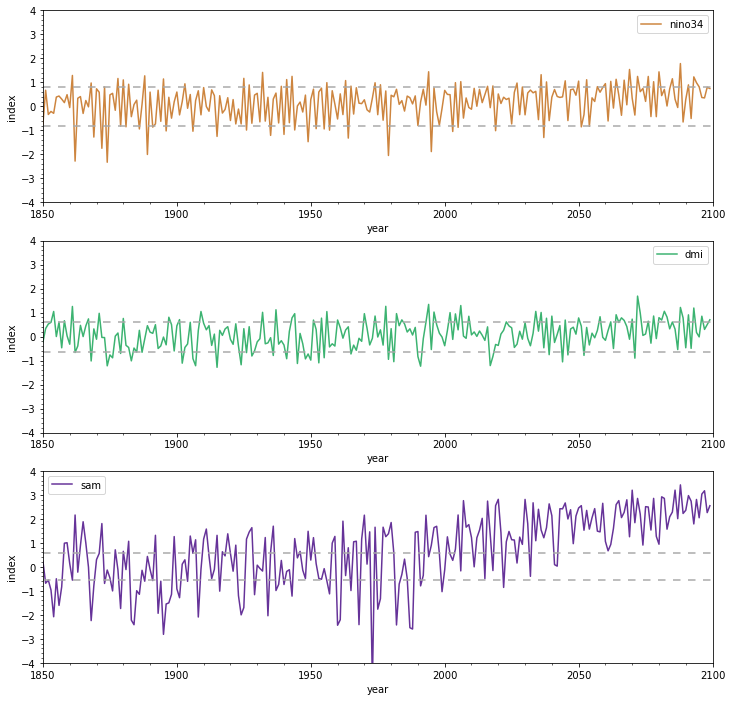

In [8]:
# plot indeces for an experiment, and add some lines for +- 1 sigma

indexToPlot = ['nino34', 'dmi', 'sam']
colors = ['peru', 'mediumseagreen', 'rebeccapurple']
lims = [(-4,4), [-4,4], [-4,4]]

print('Cmip6 Experiment: ' + mToPlot)

# first define somewhere to plot
fig = plt.figure(figsize=(12,12))

for i in range(3):
    
    fig.add_subplot(3,1,i+1)
    
    # plot the actual data
    plotData=indecesXr[indexToPlot[i]].sel(model=mToPlot) 
    plt.plot(plotData.year, plotData.values, label=indexToPlot[i], color=colors[i])
    
    # draw some horizontal lines for criteria
    eventCrit=criteriaXr[indexToPlot[i]].sel(model=mToPlot).values
    plt.axhline(y=eventCrit, dashes=(5,5), color='darkgrey')
    plt.axhline(y=-eventCrit, dashes=(5,5), color='darkgrey')

    #Tidy up a bit
    plt.xlabel('year')
    plt.ylabel('index')
    plt.xlim(1850,2100)
    plt.ylim(lims[i])
    plt.minorticks_on()
    plt.legend()


# Plot an example of compounding

In [9]:
firePos=xarray.open_dataset('results/cmip6TradCompounds.nc').sel(year=slice(1850,2099), fire='pos', experiment='ssp585', drop=True)

fireNeg=xarray.open_dataset('results/cmip6TradCompounds.nc').sel(year=slice(1850,2099), fire='neg', experiment='ssp585', drop=True)

In [10]:
firePos

<xarray.Dataset>
Dimensions:      (model: 38, year: 250)
Coordinates:
  * model        (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * year         (year) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099
Data variables:
    nino34       (model, year) float64 ...
    dmi          (model, year) float64 ...
    sam          (model, year) float64 ...
    nEvents      (model, year) float64 ...
    all3         (model, year) float64 ...
    nino34+dmi   (model, year) float64 ...
    nino34+sam   (model, year) float64 ...
    dmi+sam      (model, year) float64 ...
    anyCompound  (model, year) float64 ...
Attributes:
    all3:     ['nino34', 'dmi', 'sam']
    indeces:  ['nino34', 'dmi', 'sam']
    pairs:    ['nino34+dmi', 'nino34+sam', 'dmi+sam']

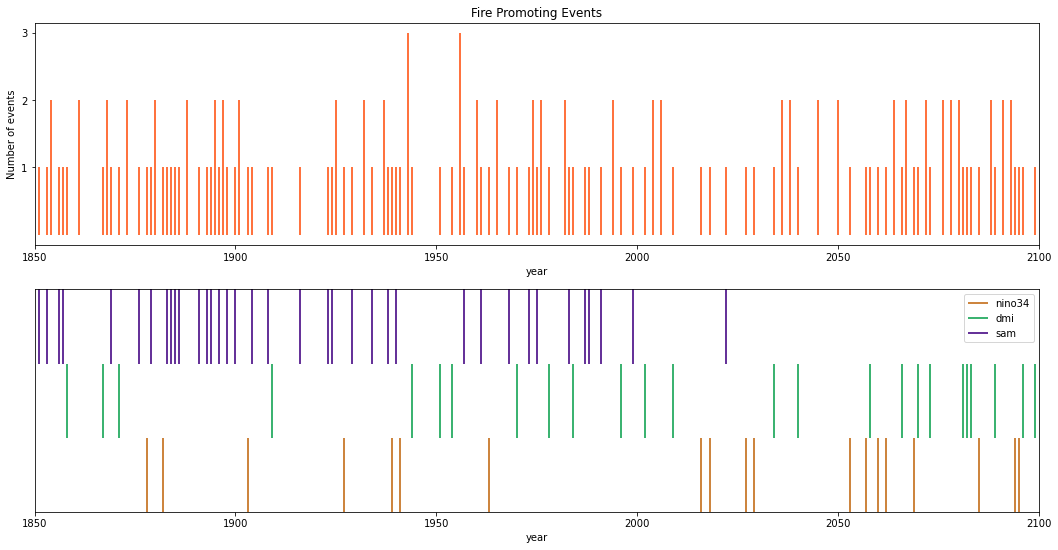

In [11]:
toPlot=(firePos.sel(model=mToPlot))

plt.figure(figsize=(18,9))

#plot the pos events in orange 

plt.subplot(2,1,1)

plt.vlines(
    x=toPlot.year, 
    ymin=0,
    ymax=toPlot.nEvents,
    colors='orangered', 
    label=mToPlot
)
plt.xlim(1850,2100)
plt.xlabel('year')
plt.ylabel('Number of events')
plt.yticks([1,2,3])
plt.title('Fire Promoting Events')

plt.subplot(2,1,2)
iPlot=0
for iIndex in indexToPlot:
    plt.vlines(
        x=(toPlot[iIndex].where(toPlot[iIndex])).year, 
        ymin=iPlot,
        ymax=(iPlot+1)*(toPlot[iIndex].where(toPlot[iIndex])),
        color=colors[iPlot], 
        label=iIndex,
        linewidth=2
    )
    iPlot=iPlot+1
    plt.legend()
    plt.xlim(1850,2100)
    plt.xlabel('year')
    plt.ylim([0,3])
    plt.yticks([])


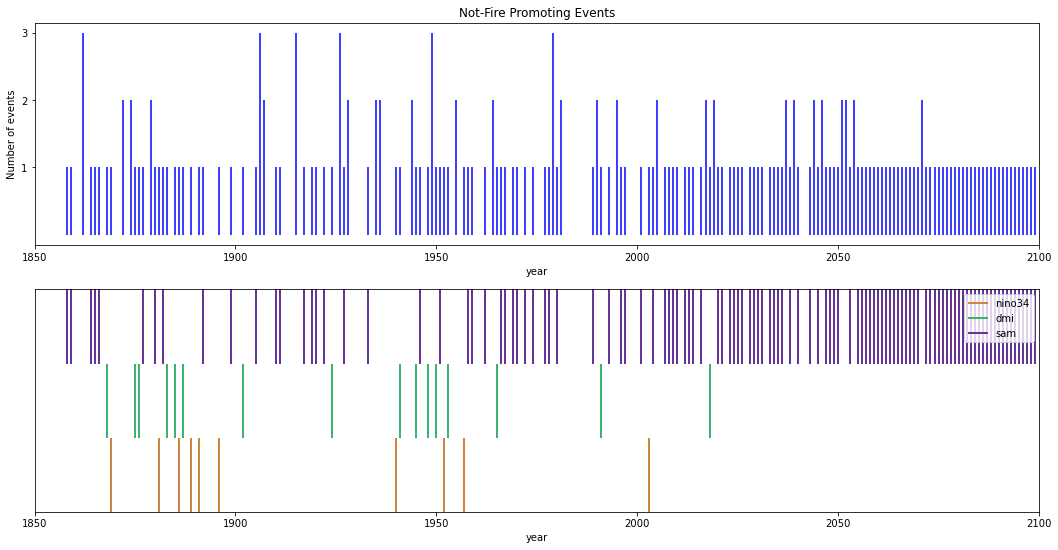

In [12]:
# and the neg count in blue

toPlot=(fireNeg.sel(model=mToPlot))

plt.figure(figsize=(18,9))

plt.subplot(2,1,1)
plt.vlines(
    x=toPlot.year, 
    ymin=0,
    ymax=toPlot.nEvents,
    colors='blue', 
    label=mToPlot
)
plt.xlim(1850,2100)
plt.xlabel('year')
plt.ylabel('Number of events')
plt.yticks([1,2,3])
plt.title('Not-Fire Promoting Events')


plt.subplot(2,1,2)
iPlot=0
for iIndex in indexToPlot:

    plt.vlines(
        x=(toPlot[iIndex].where(toPlot[iIndex])).year, 
        ymin=iPlot,
        ymax=(iPlot+1)*(toPlot[iIndex].where(toPlot[iIndex])),
        color=colors[iPlot], 
        label=iIndex,
        linewidth=2
    )
    iPlot=iPlot+1
    plt.legend()
    plt.xlim(1850,2100)
    plt.xlabel('year')
    plt.ylim([0,3])
    plt.yticks([])


# Overlapping bins

As compounds in individual years are not very good for determining trends, lets put them in 30 year bins

In [13]:
overlapBinFirePos=overlapBins.binSum(firePos)
overlapBinFireNeg=overlapBins.binSum(fireNeg)


In [14]:
overlapBinFireNeg

<xarray.Dataset>
Dimensions:      (model: 38, year: 22)
Coordinates:
  * model        (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * year         (year) int64 1865 1875 1885 1895 1905 ... 2045 2055 2065 2075
Data variables:
    nino34       (year, model) float64 2.0 2.0 2.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
    dmi          (year, model) float64 2.0 2.0 5.0 3.0 1.0 ... 0.0 0.0 0.0 0.0
    sam          (year, model) float64 6.0 4.0 7.0 6.0 ... 23.0 19.0 24.0 28.0
    nEvents      (year, model) float64 14.0 18.0 21.0 19.0 ... 39.0 36.0 32.0
    all3         (year, model) float64 0.0 0.0 1.0 1.0 0.0 ... 1.0 0.0 0.0 0.0
    nino34+dmi   (year, model) float64 1.0 0.0 1.0 2.0 1.0 ... 0.0 0.0 0.0 0.0
    nino34+sam   (year, model) float64 0.0 3.0 1.0 1.0 2.0 ... 5.0 10.0 6.0 2.0
    dmi+sam      (year, model) float64 1.0 2.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    anyCompound  (year, model) float64 2.0 5.0 3.0 4.0 3.0 ... 6.0 10.0 6.0 2.0
Attributes:
    all3:     ['nino34', 'dmi', 'sam']
    indeces:  ['nino34', 'dmi', 'sam']
    pairs:    ['nino34+dmi', 'nino34+sam', 'dmi+sam']
    Bins:     Overlapping 30 year bins, seperating by 10 year intervals
    Year:     Midpoint of bin

In [15]:
binnedPosCount = overlapBinFirePos.anyCompound
binnedNegCount = overlapBinFireNeg.anyCompound

Text(0.5, 1.0, 'Compound events in non-overlapping 30 year bins for rcp585 results.')

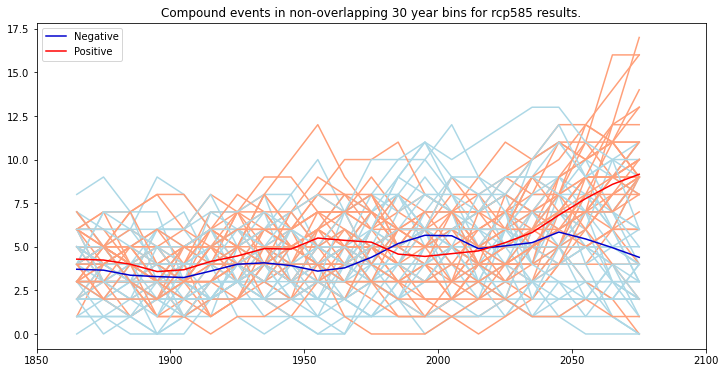

In [16]:
fig = plt.figure(figsize=(12,6))

for iMod in binnedNegCount.model.values:
    plt.plot(binnedNegCount.year, binnedNegCount.sel(model=iMod).values, color='lightblue')
    plt.plot(binnedPosCount.year, binnedPosCount.sel(model=iMod).values, color='lightsalmon')
    
plt.plot(binnedNegCount.year, binnedNegCount.mean(dim='model') , color='mediumblue', label='Negative')
plt.plot(binnedPosCount.year, binnedPosCount.mean(dim='model') , color='red', label = 'Positive')   

plt.xlim(1850, 2100)
plt.legend()
plt.title('Compound events in non-overlapping 30 year bins for rcp585 results.')

Text(0.5, 1.0, 'Number of Compound Not Fire-Promoting')

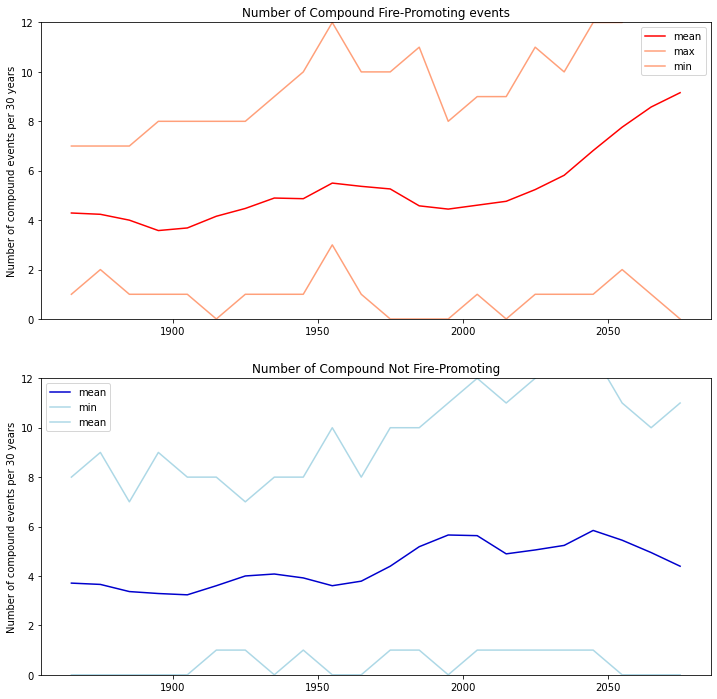

In [17]:
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
    
plt.plot(overlapBinFirePos.year, overlapBinFirePos.anyCompound.mean(dim='model') , color='red', label='mean')   
plt.plot(overlapBinFirePos.year, overlapBinFirePos.anyCompound.max(dim='model') , color='lightsalmon', label='max')
plt.plot(overlapBinFirePos.year, overlapBinFirePos.anyCompound.min(dim='model') , color='lightsalmon', label='min')

plt.legend()

plt.ylim([0,12])
plt.ylabel('Number of compound events per 30 years')
plt.title('Number of Compound Fire-Promoting events')

plt.subplot(2,1,2)
    
plt.plot(overlapBinFireNeg.year, overlapBinFireNeg.anyCompound.mean(dim='model') , color='mediumblue', label='mean')
plt.plot(overlapBinFireNeg.year, overlapBinFireNeg.anyCompound.max(dim='model') , color='lightblue', label='min')
plt.plot(overlapBinFireNeg.year, overlapBinFireNeg.anyCompound.min(dim='model') , color='lightblue', label='mean')

plt.legend()

plt.ylim([0,12])
plt.ylabel('Number of compound events per 30 years')
plt.title('Number of Compound Not Fire-Promoting')

# And by event type

It looks like there is a trend of increasing number of compounds, so lets look at which event pairs are most common

In [18]:
overlapBinFireNeg

<xarray.Dataset>
Dimensions:      (model: 38, year: 22)
Coordinates:
  * model        (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * year         (year) int64 1865 1875 1885 1895 1905 ... 2045 2055 2065 2075
Data variables:
    nino34       (year, model) float64 2.0 2.0 2.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
    dmi          (year, model) float64 2.0 2.0 5.0 3.0 1.0 ... 0.0 0.0 0.0 0.0
    sam          (year, model) float64 6.0 4.0 7.0 6.0 ... 23.0 19.0 24.0 28.0
    nEvents      (year, model) float64 14.0 18.0 21.0 19.0 ... 39.0 36.0 32.0
    all3         (year, model) float64 0.0 0.0 1.0 1.0 0.0 ... 1.0 0.0 0.0 0.0
    nino34+dmi   (year, model) float64 1.0 0.0 1.0 2.0 1.0 ... 0.0 0.0 0.0 0.0
    nino34+sam   (year, model) float64 0.0 3.0 1.0 1.0 2.0 ... 5.0 10.0 6.0 2.0
    dmi+sam      (year, model) float64 1.0 2.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    anyCompound  (year, model) float64 2.0 5.0 3.0 4.0 3.0 ... 6.0 10.0 6.0 2.0
Attributes:
    all3:     ['nino34', 'dmi', 'sam']
    indeces:  ['nino34', 'dmi', 'sam']
    pairs:    ['nino34+dmi', 'nino34+sam', 'dmi+sam']
    Bins:     Overlapping 30 year bins, seperating by 10 year intervals
    Year:     Midpoint of bin

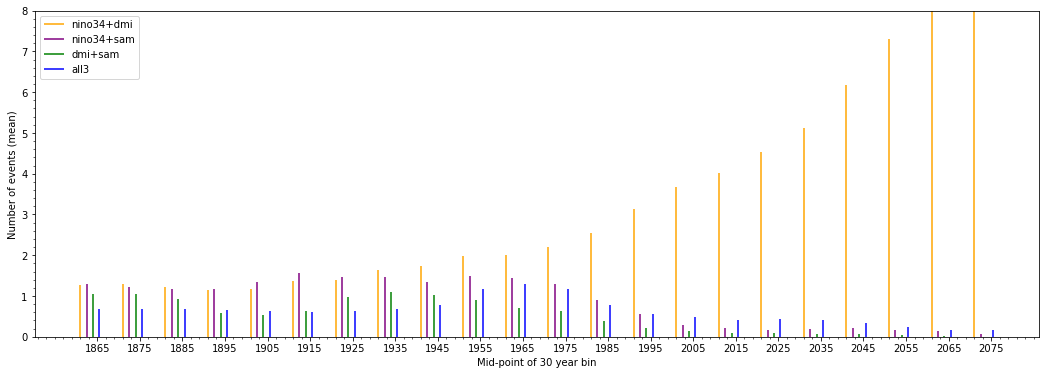

In [19]:
overlapBins.binPlot(overlapBinFirePos)

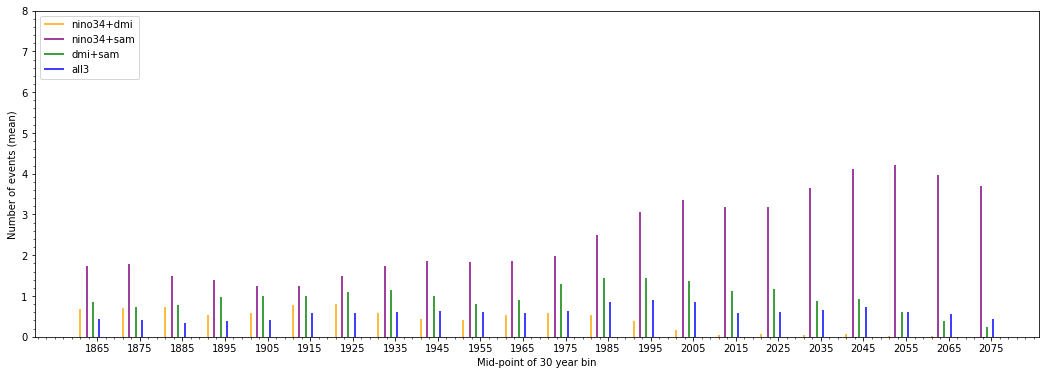

In [20]:
overlapBins.binPlot(overlapBinFireNeg)

# Time of emergence

In [21]:
%run utils/emergence.ipynb

Using pi control as the background/mean state:

In [22]:
piControlXr=xarray.open_dataset('results/cmip6TradCompounds.nc').sel(fire='pos', experiment='piControl', drop=True)

climatList = list()

#using bin sum is a bit funky because the models have different start and end years
#run binSum for each model seperately, after filtering the nans
for iModel in piControlXr.model.values:
    try:
        climatList.append(overlapBins.binSum(piControlXr.where(piControlXr.sel(model=iModel).isnull()!=True, drop=True)))
    except Exception as e:
        print(iModel)
        print(e)
        
piControlBinSumXr = xarray.merge(climatList)

Do a plot to show time of emergence.
Using mean/min/max in each interval as the trend, and number of events (95%CI) in piControl as the baseline

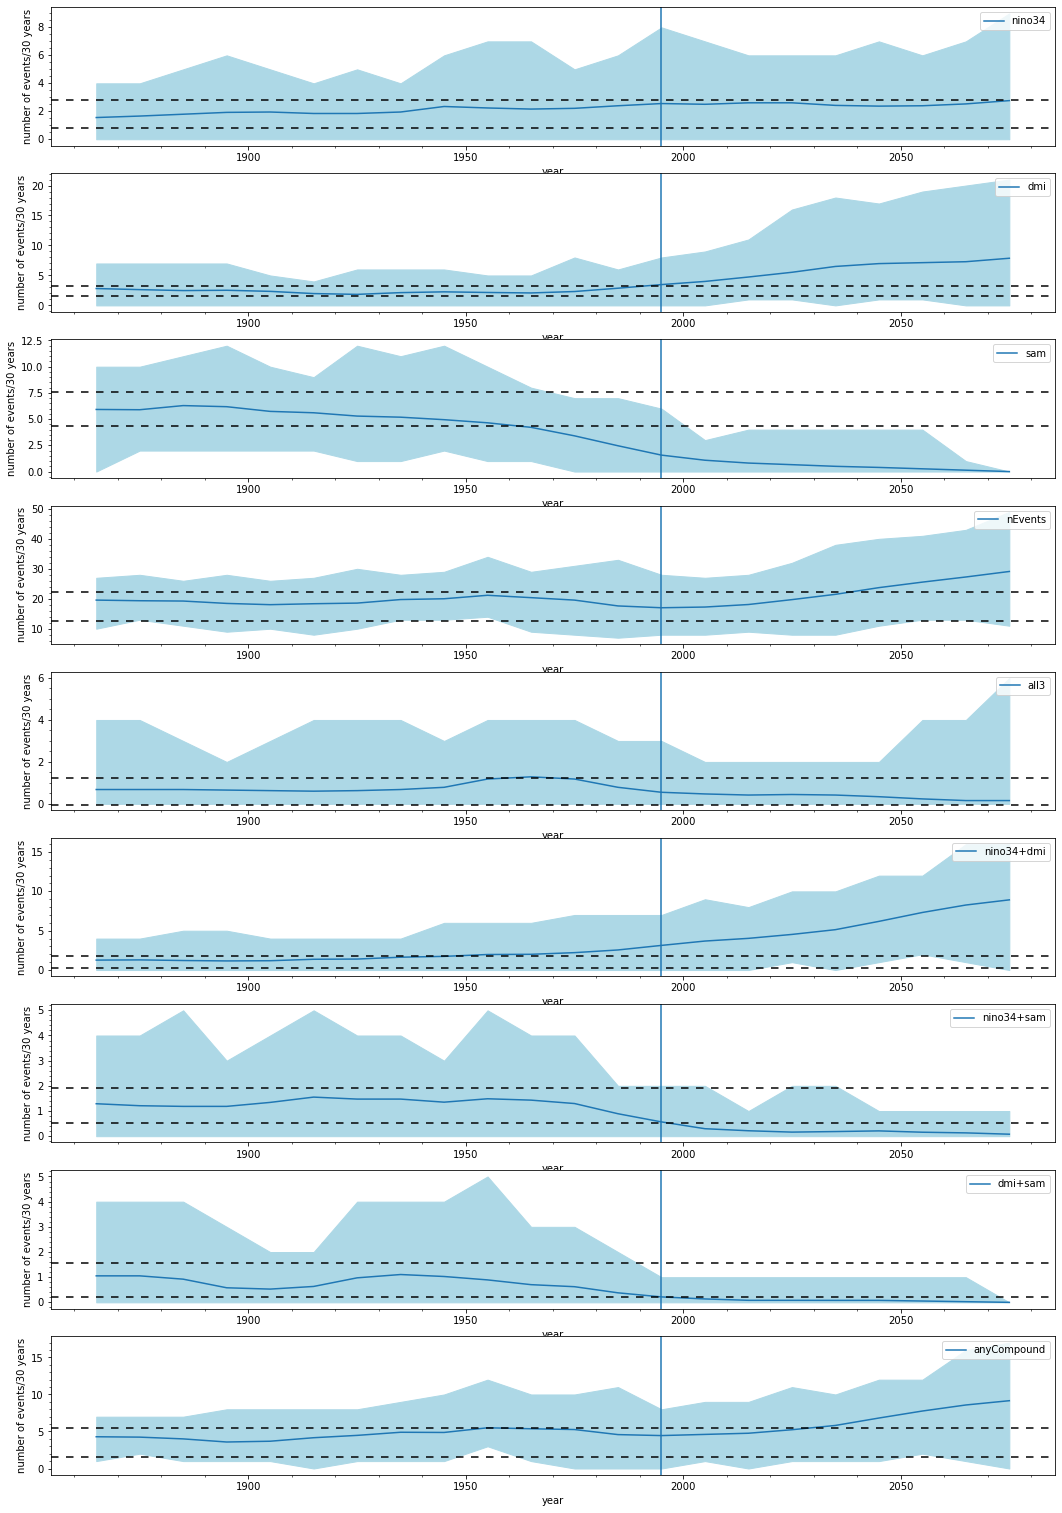

In [23]:
emergePlot(overlapBinFirePos, piControlBinSumXr)

Again for fire neg

In [24]:
piControlFireNegXr=xarray.open_dataset('results/cmip6TradCompounds.nc'
                                      ).sel(fire='neg', experiment='piControl', drop=True)

In [25]:
climatList = list()

#using bin sum is a bit funky because the models have different start and end years
#run binSum for each model seperately, after filtering the nans
for iModel in piControlXr.model.values:
    try:
        climatList.append(
            overlapBins.binSum(
                piControlFireNegXr.where(piControlFireNegXr.sel(model=iModel).isnull()!=True, drop=True)
            )
        )
    except Exception as e:
        print(iModel)
        print(e)
        
piControlFireNegBinSumXr = xarray.merge(climatList)

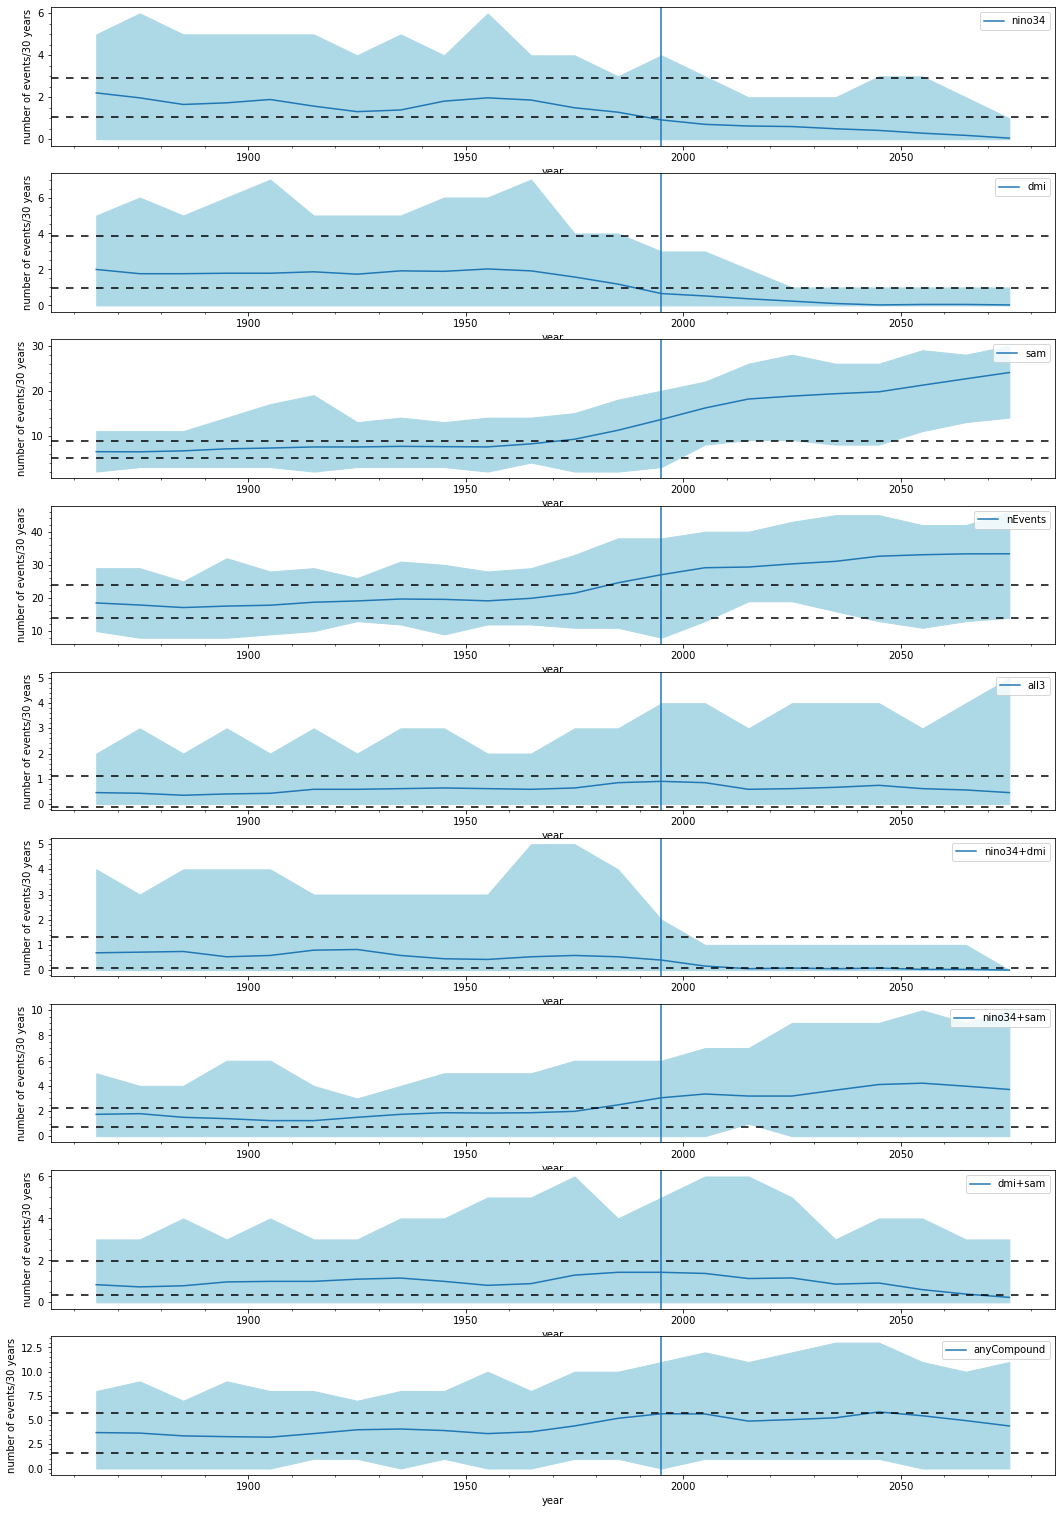

In [26]:
emergePlot(overlapBinFireNeg, piControlFireNegBinSumXr)